# Frequency Envelope Conversion as a Visual Gallery?

In [4]:
from dlcliche.notebook import *
from dlcliche.image import *
from lib_fat2019 import *
from domain_freq_xfer import *

#plt_looks_good()

# Folders
conf.DATA = Path('/mnt/dataset/freesound-audio-tagging-2019')
conf.ROOT = Path('/mnt/dataset/fat2019_files')
conf.WORK = Path('/mnt/dataset/work/fat2019')
update_conf(conf)

## Analyze frequency envelope

Frequency envelope here is the mean frequencies of all over time axis of all class samples in the dataset.

In [5]:
Xsrc = load_pkl(conf.MELSP_TRN_NOISY_SINGLE)
ysrc = pd.read_csv(conf.CSV_TRN_NOISY_SINGLE).labels
Xdest = load_pkl(conf.MELSP_TRN_CURATED)
ydest = pd.read_csv(conf.CSV_TRN_CURATED).labels
classes = get_classes(conf)

dom_freq_xfer = DomainFreqTransfer(classes)
dom_freq_xfer.fit(Xdest, ydest, src_domain_X=Xsrc, src_domain_ml_y=ysrc)

As you can see:

- `src` noisy set is quite different from `dest` curated envelope.
- Musical instrument sounds seems to be similar but still has differences.

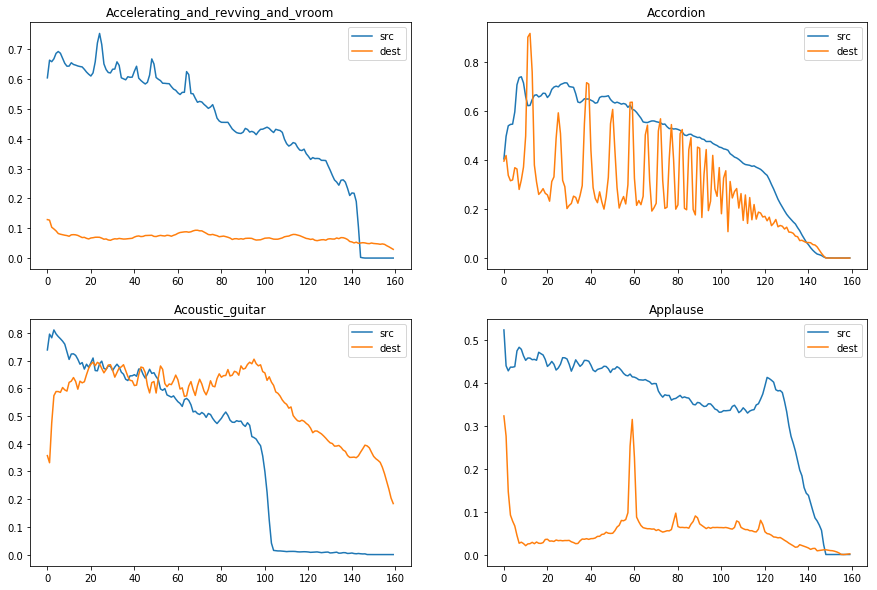

In [10]:
for ci, ax in enumerate(subplot_matrix(columns=2, rows=2, figsize=(15,10))):
    ax.plot(dom_freq_xfer.src_freq_envs[ci]/255, label='src')
    ax.plot(dom_freq_xfer.dest_freq_envs[ci]/255, label='dest')
    ax.legend()
    ax.set_title(classes[ci])

## Convert envelope from noisy to curated domain

- Conversion is applied to the higher amplitude only than curated, suppressing statistically larger amplitude frequencies to fit to curated's.
- Frequencies of noisy set which is lower than curated are kept as they are, due to avoiding difficulty to amplify silence to desired amplitude.

_`src`_ is noisy set envelope, _`dest`_ is curated's, and _`mapped`_ is envelope mapped from noisy to curated according to the design above.

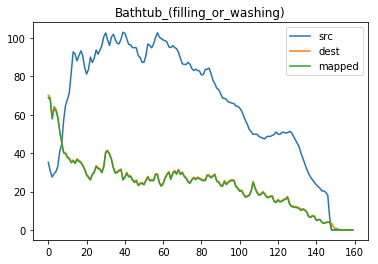

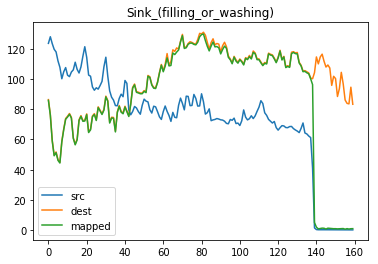

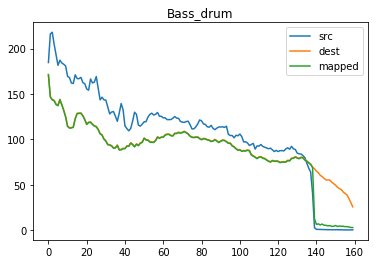

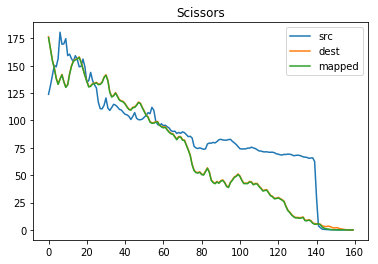

In [11]:
dom_freq_xfer(Xsrc, ysrc, show_samples=4)